In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
import matplotlib.pyplot as plt

import functools
import operator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from numpy.core.umath_tests import inner1d
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

import itertools

In [2]:
path=r"C:\Users\Hanane\Documents\Python_Scripts\TelecomParis\Module_11_Calcul_Disribue\ml-latest-small"
file_movies="movies.csv"
file_ratings="ratings.csv"

## Q 1.1 Calculer dans un premier temps :

#### • la matrice de vote avec en ligne les films et en colonnes les utilisateurs, chaque case indiquant le vote ;

In [102]:
df_ratings=pd.read_csv(path+"\\"+file_ratings)
print(df_ratings.head())
df_ratings_reshaped=df_ratings.pivot(index="movieId",columns='userId',values="rating")
df_ratings_reshaped=df_ratings_reshaped.fillna(0)
# df_ratings_reshaped=df_ratings_reshaped.replace(np.nan,0)
df_ratings_reshaped.head()

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# idx_ratings = list(zip(*np.nonzero(df_ratings_reshaped.values)))
# idx_ratings

#### • la matrice de descriptions des films : il faut binariser les genres, i.e. une colonne par genre ; un 1 indique la présence du genre pour le film, un 0 l’absence. Ajouter à cette matrice de description en dernière colonne le nombre de vote que a reçu ce film et le vote moyen obtenu. Vous pouvez également ajouter l’année de production du film (il est présent dans le titre du film).

In [9]:
df_movies=pd.read_csv(path+"\\"+file_movies)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##### il faut binariser les genres, i.e. une colonne par genre ; un 1 indique la présence du genre pour le film, un 0 l’absence

In [11]:
df_movies['list_genre']=df_movies['genres'].apply(lambda x:x.split("|"))
list_genre_unique=df_movies['genres'].unique()
list_genre_new=np.array([elem.split("|") for elem in list_genre_unique])
list_genre_new=functools.reduce(operator.concat, list_genre_new)
np.unique(list_genre_new)

for col in list_genre_new:
    df_movies[col]=df_movies['list_genre'].apply(lambda x: 1 if col in x else 0)
    
df_movies.head()

,movieId,title,genres,list_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


##### Ajouter à cette matrice de description en dernière colonne le nombre de vote que a reçu ce film et le vote moyen obtenu

In [130]:
df_ratings_calc=df_ratings.groupby('movieId')['rating'].aggregate(['count','mean']).rename(columns={'count':'ratings_nb','mean':'ratings_mean'})
print("nbr movies rated",df_ratings_calc.shape)
print("nbr ",df_movies.shape)
# df_movies['list_genre'].apply(lambda x: 1 if "Children" in x else 0)
df_movies=df_movies.join(df_ratings_calc,on='movieId',how="left")
df_movies.head()

#check
# print(df_movies[df_movies['ratings_nb'].isnull()].head())
# df_ratings.query("movieId==1076")

nbr movies rated (9724, 2)
nbr  (9742, 24)


,movieId,title,genres,list_genre,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),ratings_nb,ratings_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,215.0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,110.0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,52.0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,7.0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,49.0,3.071429


##### Vous pouvez également ajouter l’année de production du film (il est présent dans le titre du film).

In [131]:
df_movies['year_film']=df_movies['title'].apply(lambda x: x[-5:-1])
# df_movies["year_film"]=df_moviesn["title"].str.extract(r"\((\d\d\d\d)\)").fillna(2019)

## Q 1.2 Explorer les données en regardant en particulier :

##### • la matrice des votes (vous pouvez l’afficher graphiquement)

In [20]:
df_ratings_reshaped.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


##### • la distribution du nombre de votes des utilisateurs

(array([0.03019204, 0.06194877, 0.03947003, 0.16640882, 0.12231081,
        0.44179548, 0.28949097, 0.59101467, 0.18844681, 0.29114382]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

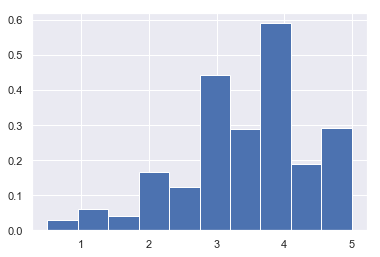

In [107]:
# df_ratings['rating'].hist(density=True)
plt.hist(df_ratings['rating'],density=True)

##### • la distribution du nombre de vote par film

(array([7.757e+03, 8.360e+02, 3.530e+02, 2.460e+02, 1.490e+02, 1.040e+02,
        6.300e+01, 4.300e+01, 3.500e+01, 3.600e+01, 1.800e+01, 1.800e+01,
        1.600e+01, 7.000e+00, 5.000e+00, 6.000e+00, 6.000e+00, 6.000e+00,
        7.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  1.        ,  11.93333333,  22.86666667,  33.8       ,
         44.73333333,  55.66666667,  66.6       ,  77.53333333,
         88.46666667,  99.4       , 110.33333333, 121.26666667,
        132.2       , 143.13333333, 154.06666667, 165.        ,
        175.93333333, 186.86666667, 197.8       , 208.73333333,
        219.66666667, 230.6       , 241.53333333, 252.46666667,
        263.4       , 274.33333333, 285.26666667, 296.2       ,
        307.13333333, 318.06666667, 329.        ]),
 <a list of 30 Patch objects>)

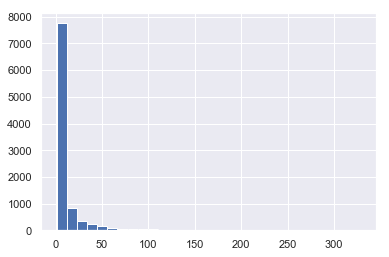

In [108]:
# df_ratings_calc.sort_values(by='ratings_nb',ascending=False).head()
# df_ratings_calc.query("ratings_nb>=1 and ratings_nb<=12").shape
plt.hist(df_ratings_calc['ratings_nb'],bins=30)

##### • la distribution de la moyenne des votes de chaque utilisateur

(array([  96.,   12.,  158.,   27.,  226.,   83.,  484.,  210.,  703.,
         259.,  497., 1343.,  779., 1432.,  872., 1403.,  361.,  437.,
          43.,  299.]),
 array([0.5  , 0.725, 0.95 , 1.175, 1.4  , 1.625, 1.85 , 2.075, 2.3  ,
        2.525, 2.75 , 2.975, 3.2  , 3.425, 3.65 , 3.875, 4.1  , 4.325,
        4.55 , 4.775, 5.   ]),
 <a list of 20 Patch objects>)

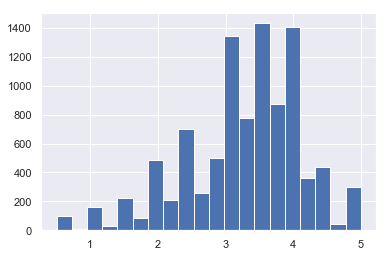

In [109]:
# df_ratings_calc.head()
plt.hist(df_ratings_calc['ratings_mean'],bins=20)

##### • la corrélation entre le nombre de votes pour un film et sa note moyenne

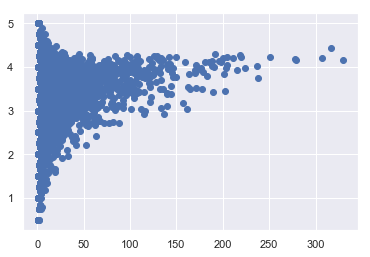

In [110]:
plt.scatter(df_ratings_calc['ratings_nb'],df_ratings_calc['ratings_mean'])

In [28]:
df_ratings_calc['ratings_nb'].corr(df_ratings_calc['ratings_mean'])

0.12725857359560638

## Q 1.3 Selon vos constatations, quelle(s) difficulté(s) peuvent se présenter pour les techniques de Machine Learning ?

## Q 1.4 Dans la suite, pour évaluer nos méthodes, nous utiliserons principalement les courbes ROC.
Pour cela, nous avons besoin de binariser la décision et non pas d’attribuer un score à un film (j’aime
ou j’aime pas). Quel seuil proposez-vous sur le score pour établir la limite entre les deux classes ? Est-il
judicieux de faire un seuil par utilisateur ?

Supp à median => j'aime
Inf à median => j'aime pas
ça peut être judicieux d'appliquer un seuil par utilisateur,car certains peuvent être assez dur ou facile à noter

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

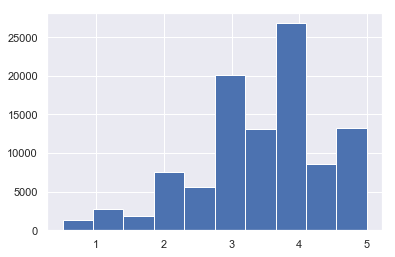

In [111]:
plt.hist(df_ratings['rating'],bins=10)

In [112]:
median_v=df_ratings['rating'].median()

# 2 Classifieurs binaires pour la recommendation

## Q 2.1 Proposer un protocole expérimental pour 

### 1) traiter les données afin d’en faire un problème de classification binaire,

Pour pouvoir prédire si le film est en moyenne apprécié ou non, nous devons transformer la target "ratings_mean" en variable binaire
    
       if ratings_mean>median than label=1, that's mean the movie is appreciated
       else label=0, the movie is not appreciated
We will use all columns generated from "genre" list, the number of ratings (and not include the year of the film at the first attemp)

In [135]:
df_movies.columns

Index(['movieId', 'title', 'genres', 'list_genre', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical',
       'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)',
       'ratings_nb', 'ratings_mean', 'year_film'],
      dtype='object')

In [136]:
columns=['movieId','Adventure', 'Animation','Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical','Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)',
       'ratings_nb', 'ratings_mean']
features=['Adventure', 'Animation','Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical','Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']
#features: don't keep ratings_nb
df=df_movies[columns]

df['label']=1
df.loc[df['ratings_mean']<median_v,'label']=0

df['ratings_nb']=df['ratings_nb'].replace(np.nan,0)
df=df.set_index('movieId')

#the classes are balanced ==> as we used median_v to create the label
print("count of classes", df.groupby('label')['label'].count())

# Split Train Test
X_train,X_test,y_train,y_test=train_test_split(df[features],df['label'],test_size=0.2,random_state=42)

count of classes label
0    5044
1    4698
Name: label, dtype: int64


For some models we don't have to standard scaler the column ratings_nb ==> example RandomForest or Boosting

In [137]:
def conf_matrix_accuracy(y_true,y_pred):
    cm=confusion_matrix(y_true,y_pred)
    per_class = np.diag(cm) / cm.sum(axis=1)
    score=np.mean(per_class)
    return score

#### RUN MODELS

In [138]:
classifiers=[('RF',RandomForestClassifier()),("LR",LogisticRegression()),("GB",GradientBoostingClassifier())]

score_model=[]
accuracy_bal=[]
for clf_name, clf in classifiers: 
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    score_model.append([clf_name,clf.score(X_test,y_test)])
    accuracy_bal.append([clf_name,conf_matrix_accuracy(y_test,y_pred)])
#     print("model accuracy",)
#     print("conf_matrix_accuracy",)
print(score_model)
print(accuracy_bal)

[['RF', 0.620831195484864], ['LR', 0.62955361723961], ['GB', 0.6341713699332991]]
[['RF', 0.6205647759806459], ['LR', 0.6295207961376338], ['GB', 0.6333620334470773]]


### 2) évaluer votre modèle avec une courbe ROC.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

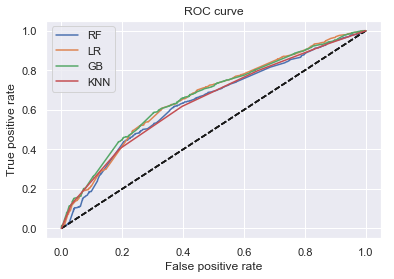

In [139]:
classifiers=[('RF',RandomForestClassifier()),("LR",LogisticRegression()),("GB",GradientBoostingClassifier()),('KNN',KNeighborsClassifier())]

false_pos_rate=[]
true_pos_rate=[]

score_model=[]
accuracy_bal=[]
for clf_name, clf in classifiers: 
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    if clf_name=='RF' or clf_name=='KNN':
        y_score=clf.predict_proba(X_test)[:,-1]
    else:
        y_score=clf.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    false_pos_rate.append(fpr)
    true_pos_rate.append(tpr)

i=0
for clf_name,clf in classifiers:
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_pos_rate[i], true_pos_rate[i], label=clf_name)
    i+=1
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [140]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
# y_score=clf.fit(X_train, y_train).decision_function(X_test)
y_score=clf.predict_proba(X_test)[:,-1]

df_res=pd.DataFrame(data=y_score,index=X_test.index)
df_res=df_res.sort_values(by=0,ascending=False)
# df_res.head()

df_res.join(df_movies.set_index("movieId")).head()

,0,title,genres,list_genre,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),ratings_nb,ratings_mean,year_film
movieId,,,,,,,,,,,,,,,,,,,,,
147300,1.0,Adventures Of Sherlock Holmes And Dr. Watson: ...,Crime|Mystery,"[Crime, Mystery]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,5.0,1986
140541,1.0,The Electric Hotel (1908),Animation|Comedy|Sci-Fi,"[Animation, Comedy, Sci-Fi]",0,1,0,1,0,0,...,0,0,0,0,0,0,0,1.0,4.0,1908
3334,1.0,Key Largo (1948),Crime|Drama|Film-Noir|Thriller,"[Crime, Drama, Film-Noir, Thriller]",0,0,0,0,0,0,...,0,0,0,0,0,1,0,10.0,4.2,1948
140481,1.0,"Family Guy Presents: Something, Something, Som...",Animation|Comedy|Sci-Fi,"[Animation, Comedy, Sci-Fi]",0,1,0,1,0,0,...,0,0,0,0,0,0,0,1.0,4.5,2009
101025,1.0,Jack the Giant Slayer (2013),Adventure|Fantasy|IMAX,"[Adventure, Fantasy, IMAX]",1,0,0,0,1,0,...,0,0,0,1,0,0,0,5.0,2.2,2013


### Q 2.2 Tester quelques classifieurs usuels : forêts aléatoires, boosting, k-plus proches voisins. Commenter vos résultats.

already done ==> Gradient Booosting is the best model

# 3 Instance based learning

## Q 3.1 Pour calculer la similarité entre utilisateurs,

Q 3.1 Pour calculer la similarité entre utilisateurs, il est recommandé d’utiliser la distance cosine
d(x, x0) = 1 −<x.x0>/kxkkx0k plutôt que la distance euclidienne (pourquoi ?). Calculer la matrice de similarité
des utilisateurs avec les deux variantes et afficher là.

In [48]:
df_ratings.head()
# df_ratings_reshaped.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [125]:
# build a pair of userIds
list_userId=list(df_ratings['userId'].unique())
print("# userId", len(list_userId))
list_pair_users=[pair for pair in itertools.combinations(list_userId,2)]
print(len(list_pair_users))
print(list_pair_users[:3])

# userId 610
185745
[(1, 2), (1, 3), (1, 4)]


##### Cosine distance and Euclidean distance

In [126]:
def cosine_similarity(x, y):
    return 1-np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [129]:
## Calculate distances : Cosine and Euclidean. Store the result in a dataframe
# %%time
# array_res=[]
# for pair in list_pair_users:
#     cosine_sim=cosine_similarity(df_ratings_reshaped[pair[0]],df_ratings_reshaped[pair[1]])
#     eucl=euclidean_distance(df_ratings_reshaped[pair[0]],df_ratings_reshaped[pair[1]])
#     array_res.append([pair[0],pair[1],cosine_sim,eucl])

# df_sim=pd.DataFrame(data=array_res,columns=['user1','user2','cosine_sim','euclid_sim'])
# df_sim.head()

# # df_sim.to_csv("similarity.csv")

df_sim=pd.read_csv("similarity.csv")
df_sim=df_sim.drop(columns="Unnamed: 0")

df_sim_cosine=df_sim.pivot(index="user1",columns='user2',values="cosine_sim")
df_sim_eucl=df_sim.pivot(index="user1",columns='user2',values="euclid_sim")

## Check
# print(df_sim.query("user1==3 and user2==4"))
# print(cosine_similarity(df_ratings_reshaped[3],df_ratings_reshaped[4]))
# print(euclidean_distance(df_ratings_reshaped[3],df_ratings_reshaped[4]))
print(df_sim.head(5))
df_sim_cosine.head(10)

   user1  user2  cosine_sim  euclid_sim
0      1      2    0.972717   70.436141
1      1      3    0.940280   69.336138
2      1      4    0.805605   78.797208
3      1      5    0.870920   68.985506
4      1      6    0.871848   86.752522


user2,2,3,4,5,6,7,8,9,10,11,...,601,602,603,604,605,606,607,608,609,610
user1,,,,,,,,,,,,,,,,,,,,,
1,0.972717,0.94028,0.805605,0.870920,0.871848,0.841256,0.863032,0.935737,0.983125,0.867501,...,0.919446,0.835545,0.778514,0.929331,0.846375,0.835809,0.730611,0.708903,0.906428,0.854679
2,NaN,1.00000,0.996274,0.983386,0.974667,0.972415,0.972743,1.000000,0.932555,0.955581,...,0.797329,0.983134,0.988003,1.000000,1.000000,0.971571,0.987052,0.953789,0.972435,0.897573
3,NaN,NaN,0.997749,0.994980,0.996064,1.000000,0.995059,1.000000,1.000000,1.000000,...,0.994952,0.995108,0.975008,1.000000,0.989306,0.987007,0.980753,0.978872,1.000000,0.967881
4,NaN,NaN,NaN,0.871341,0.911509,0.884880,0.937031,0.988639,0.968837,0.945233,...,0.914062,0.871727,0.692027,0.947015,0.915416,0.799605,0.868254,0.850142,0.967802,0.892317
5,NaN,NaN,NaN,NaN,0.699651,0.891658,0.570925,1.000000,0.969389,0.816195,...,0.931952,0.581253,0.889852,0.741227,0.851242,0.893565,0.847134,0.864465,0.738768,0.939208
6,NaN,NaN,NaN,NaN,NaN,0.924157,0.629512,0.986096,0.979615,0.779765,...,0.978585,0.551073,0.901998,0.603418,0.895459,0.897877,0.837818,0.821191,0.785766,0.947332
7,NaN,NaN,NaN,NaN,NaN,NaN,0.885115,0.900537,0.867901,0.805322,...,0.793595,0.874818,0.896336,0.937975,0.780414,0.799965,0.813886,0.676459,0.909160,0.806781
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.976086,0.764666,...,0.919797,0.449448,0.898874,0.675505,0.879575,0.900612,0.814858,0.812767,0.576007,0.921847
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959041,1.000000,...,0.918862,0.990743,0.955732,0.981031,0.903210,0.924102,0.988156,0.899565,1.000000,0.925601


## Q 3.2 Dans ce contexte, il n’est pas possible de séparer en ensemble de test et d’apprentissage

Q 3.2 Dans ce contexte, il n’est pas possible de séparer en ensemble de test et d’apprentissage une
partie des films et une partie des utilisateurs, puisqu’une information sur les deux est nécessaire afin
d’émettre une recommandation. Le découpage se fait sur les votes exprimés, une partie des votes est
retirée de la matrice afin d’évaluer l’algorithme. 
    
    Quelles précautions prendre lors de ce découpage ?

In [ ]:
#comment n'enlever que quelques cases dans le df df_ratings_reshaped ==> size = 5 931 640
#Pourquoi ne pas le faire directement sur le df_ratings (original)? ==> size = 403 344

## Q 3.3 Implémenter un algorithme de recommandation (avec ou sans vote pondéré) et tracer la courbe ROC associée

    1.pour un utilisateur et un film à prédire, agréger les votes des utilisateurs proches de lui et 
    retourner une décision en fonction de cette agrégation.
    2.Les votes peuvent être agréger soit de manière pondéré (par la similarité entre utilisateurs), soit de manière brute.
    
    Les votes peuvent être agréger soit de manière pondéré (par la similarité entre utilisateurs), soit de manière brute


In [141]:
# %%time
# df_sim[:100].groupby(["user1","user2"])['cosine_sim'].nsmallest(5)
df_kneighbors=df_sim.groupby(["user1"]).apply(lambda x: x.nsmallest(5,['cosine_sim'])).reset_index(drop=True)
df_kneighbors=df_kneighbors.set_index('user1').join(df_kneighbors.groupby("user1")[['cosine_sim','euclid_sim']].sum().rename(columns={'cosine_sim':'cosine_sim_sum','euclid_sim':'euclid_sim_sum'}))
df_kneighbors.head()

,user2,cosine_sim,euclid_sim,cosine_sim_sum,euclid_sim_sum
user1,,,,,
1,266,0.642592,68.490875,3.266143,393.206177
1,313,0.648438,76.850504,3.266143,393.206177
1,368,0.654873,75.405570,3.266143,393.206177
1,57,0.654966,83.522452,3.266143,393.206177
1,91,0.665273,88.936775,3.266143,393.206177


        Dans ce contexte, il n’est pas possible de séparer en ensemble de test et d’apprentissage une partie des films et une partie des utilisateurs, puisqu’une information sur les deux est nécessaire afin d’émettre une recommandation. Le découpage se fait sur les votes exprimés, une partie des votes est retirée de la matrice afin d’évaluer l’algorithme.

In [142]:
###Retravailler
df_ratings['label']=1
df_ratings.loc[df_ratings['rating']<median_v,'label']=0
df_ratings.head()

X_train,X_test,y_train,y_test=train_test_split(df_ratings[['userId','movieId','rating']],df_ratings['label'],test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
df_check=df_ratings.groupby('userId')[['userId']].count().join(X_train.groupby('userId')[['userId']].count(),rsuffix='_train')
df_check.query("userId_train==0").head()

(80668, 3)
(20168, 3)


,userId,userId_train
userId,,


##### Building dataframe with grade calculation: sim*rating/sum_sim for a given userId and a movie

In [147]:
# # df_ratings.head()
# df_ratings.query("movieId==204").head()
# df_temp.query("user1==16")

In [146]:
# df_ratings_reshaped[[16,17]]

In [148]:
df_join_sim_movie=df_kneighbors.join(df_ratings.rename(columns={"userId":"user1"}).set_index("user1"))#.reset_index().rename(columns={"index":"user1"})
df_join_sim_movie["sim*rating"]=df_join_sim_movie['cosine_sim']*df_join_sim_movie['rating']
df_join_sim_movie["avg_rating"]=df_join_sim_movie['sim*rating']/df_join_sim_movie['cosine_sim_sum']
df_join_sim_movie.head()

,user2,cosine_sim,euclid_sim,cosine_sim_sum,euclid_sim_sum,movieId,rating,timestamp,label,sim*rating,avg_rating
user1,,,,,,,,,,,
1,266,0.642592,68.490875,3.266143,393.206177,1,4.0,964982703,1,2.570369,0.786974
1,266,0.642592,68.490875,3.266143,393.206177,3,4.0,964981247,1,2.570369,0.786974
1,266,0.642592,68.490875,3.266143,393.206177,6,4.0,964982224,1,2.570369,0.786974
1,266,0.642592,68.490875,3.266143,393.206177,47,5.0,964983815,1,3.212961,0.983717
1,266,0.642592,68.490875,3.266143,393.206177,50,5.0,964982931,1,3.212961,0.983717


In [143]:
# df_temp=df_join_sim_movie.reset_index().set_index(['user2','movieId']).join(df_ratings.rename(columns={"userId":"user2"}).set_index(['user2','movieId']),rsuffix="_user2")
# df_temp.head()

KeyboardInterrupt: 

In [145]:
# df_join_sim_movie.query("user1==1 and movieId==1")

In [149]:
df_res_grade=df_join_sim_movie.reset_index().groupby(["user1","movieId"])[['sim*rating','cosine_sim_sum']].aggregate(['sum','mean']).iloc[:,[0,3]]
df_res_grade['avg_rating']=df_res_grade.iloc[:,0]/df_res_grade.iloc[:,1]
df_res_grade['label']=1
df_res_grade.loc[df_res_grade['avg_rating']<median_v,'label']=0
print(df_res_grade.head())
df_grade=df_res_grade.reset_index()[['user1','movieId','label']]
df_grade.head()

              sim*rating cosine_sim_sum avg_rating label
                     sum           mean                 
user1 movieId                                           
1     1        13.064570       3.266143        4.0     1
      3        13.064570       3.266143        4.0     1
      6        13.064570       3.266143        4.0     1
      47       16.330713       3.266143        5.0     1
      50       16.330713       3.266143        5.0     1


,user1,movieId,label
,,,
0,1,1,1
1,1,3,1
2,1,6,1
3,1,47,1
4,1,50,1


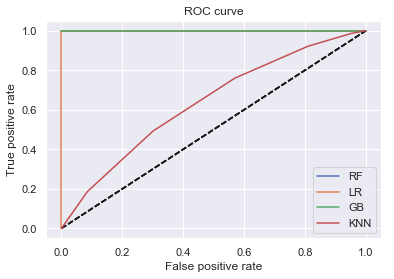

In [79]:
# X_test['label']=1
# X_test.loc[X_test['rating']<3.5,'label']=0

# y_test=X_test.iloc[:,-1]
# X_test=X_test.iloc[:,:-1]

# classifiers=[('RF',RandomForestClassifier()),("LR",LogisticRegression()),("GB",GradientBoostingClassifier()),('KNN',KNeighborsClassifier())]

# false_pos_rate=[]
# true_pos_rate=[]

# score_model=[]
# accuracy_bal=[]
# for clf_name, clf in classifiers: 
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_test)
#     if clf_name=='RF' or clf_name=='KNN':
#         y_score=clf.predict_proba(X_test)[:,-1]
#     else:
#         y_score=clf.fit(X_train, y_train).decision_function(X_test)
#     fpr, tpr, _ = roc_curve(y_test, y_score)
#     false_pos_rate.append(fpr)
#     true_pos_rate.append(tpr)

# i=0
# for clf_name,clf in classifiers:
#     plt.figure(1)
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.plot(false_pos_rate[i], true_pos_rate[i], label=clf_name)
#     i+=1
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()